In [1]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import os, sys
# import numpy as np
from performance_analysis_functions import *

In [2]:
# Automate timestamps. 
# Loading the data mapping timestamps which associates subjects to their respective trials.
data_map = os.path.expanduser(
        '~/Documents/GitHub/Analysis_Audio2AFC_ChangePoint/data_mapping.csv'
    )

read_data_map = pd.read_csv(data_map)
read_data_map.head()

,timestamp,subject,block
0,2019_06_25_11_11,1,pred
1,2019_06_25_11_40,1,rep
2,2019_06_25_12_09,2,pred
3,2019_06_25_12_31,2,rep
4,2019_06_27_13_44,3,pred


# Testing zone

## Test produce_df

In [ ]:
 # Subject 1 Report Task 
    rep = os.path.expanduser(
        '~/Documents/MATLAB/Audio2AFC_CP/processed/' +
        get_timestamp(read_data_map, subject+1, 'rep') + '/pilot' +
        str(subject+1) + 'rep_FIRA_valid_trials.csv'
    )
    
    processed_rep = produce_df(rep)
    rep_list.append(processed_rep)

    # Subject 1 Prediction Task 
    pred = os.path.expanduser(
        '~/Documents/MATLAB/Audio2AFC_CP/processed/' + get_timestamp(read_data_map, subject+1, 'pred') + '/pilot' +
        str(subject+1) + 'pred_FIRA_valid_trials.csv'
    )
    
    processed_pred = produce_df(pred)
    pred_list.append(processed_pred)



final_data_rep = pd.concat(rep_list)
final_data_pred = pd.concat(pred_list)

high_rep_list, low_rep_list, vector_rep_high, vector_rep_low = extract_hazard(final_data_rep)
high_pred_list, low_pred_list, vector_pred_high, vector_pred_low = extract_hazard(final_data_pred)

In [ ]:
sim_data = load_trial_seq()
sim_data = sim_data.iloc[:len(subj1)]
print(len(sim_data), len(subj1))
print(sim_data.head())

In [ ]:
#load sim
simu = load_trial_seq()
simu = compute_pos_data(simu)

subj1['mergeIndex'] = subj1['trialIndex'] - 1
subj1 = subj1.merge(simu[['hazard', 'source_switch', 'posSinceCP']], left_on="mergeIndex", right_index=True)
subj1.head()

In [ ]:
print(subj1['posSinceCP'].min(), subj1['posSinceCP'].max())

In [ ]:
extract_high = extract_hazard(subj1, 0.9)
list_percent, vector = compute_percent(extract_high)
print(list_percent, vector)
plt.plot(list_percent, vector)

In [ ]:
match = sim_data['source_switch'].iloc[1:].eq(subj1['sourceSwitch'].iloc[1:])

In [ ]:
print(match.sum())

In [ ]:
subject = 1  # subject 1
# Subject 1 Prediction Task 
pred = os.path.expanduser(
    '~/Documents/MATLAB/Audio2AFC_CP/processed/' + get_timestamp(read_data_map, subject+1, 'pred') + '/pilot' +
    str(subject+1) + 'pred_FIRA_valid_trials.csv'
)

processed_pred = produce_df(pred)

# print(processed_pred)
x, y, a, b = extract_hazard(processed_pred)
extract = processed_pred[processed_pred['hazard']==0.9]
# print(extract['posSinceCP'].max())

for row in range(len(extract)):
    counter = counter + 1 if not extract['sourceSwitch'].iloc[row] else 0
    if counter == 2:
        print(row)
        
print(extract.iloc[130:145, :])

#high hazard
plt.plot(a, x, linewidth = 2)
plt.plot(b, y)


## Test extract_hazard

In [ ]:
subject = 0  # subject 1
# Subject 1 Prediction Task 
pred = os.path.expanduser(
    '~/Documents/MATLAB/Audio2AFC_CP/processed/' + get_timestamp(read_data_map, subject+1, 'pred') + '/pilot' +
    str(subject+1) + 'pred_FIRA_valid_trials.csv'
)

processed_pred = produce_df(pred)

high_pred_list, low_pred_list, vector_pred_high, vector_pred_low = extract_hazard(processed_pred)

In [ ]:
# Plotting the prediction task over 4 subjects.
plt.plot(vector_pred_low, low_pred_list, linewidth = 2)
plt.plot(vector_pred_high, high_pred_list, linewidth = 2)
plt.title("Prediction Task")
plt.legend(['low hazard rate', 'high hazard rate'])
plt.xlabel('number of trials since change point')
plt.ylabel('percentage correct')

# True analysis

### Computing posSinceCP in the simulation_data file instead of the subject data file.

## Report task

In [16]:
#Load the simulation data - same for every subject and every task.
simu = load_trial_seq()
simu = compute_pos_data(simu)

In [17]:
#Create lists to append the datasets in order to average over 4 subjects.
pred_list = []
rep_list = []

In [18]:
#Report task.
num_subjects = 4
for subject in range(num_subjects): 
    subj_rep = build_filename("rep", subject)
    subj_data_rep = pd.read_csv(subj_rep)
    #Cleaning out the unnecessary columns.
    subj_data_rep = remove_cols(subj_data_rep)
    subj_data_rep = merge_pos_sim(simu, subj_data_rep)
    rep_list.append(subj_data_rep)
    
final_rep = pd.concat(rep_list)
hazard_high_rep = extract_hazard(final_rep, 0.9)
hazard_low_rep = extract_hazard(final_rep, 0.1)
    
correct_low_rep, low_vector_rep = compute_percent(hazard_low_rep)
correct_high_rep, high_vector_rep = compute_percent(hazard_high_rep)

Text(0, 0.5, 'percentage correct')

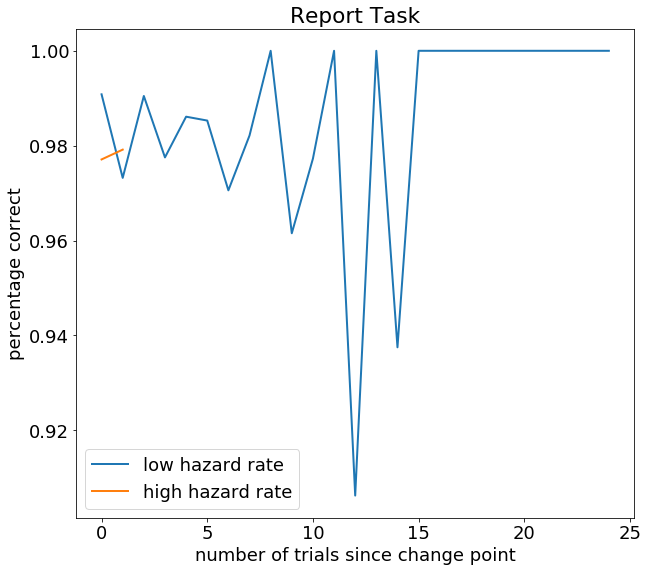

In [19]:
#Report plot
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 9) # (w, h) # figure size 
plt.rcParams.update({'font.size': 18})
plt.plot(low_vector_rep, correct_low_rep, linewidth = 2)
plt.plot(high_vector_rep, correct_high_rep, linewidth = 2)
plt.title("Report Task")
plt.legend(['low hazard rate', 'high hazard rate'])
plt.xlabel('number of trials since change point')
plt.ylabel('percentage correct')

## Prediction Task

In [21]:
#Prediction task.
num_subjects = 4
for subject in range(num_subjects): 
    subj_pred = build_filename("pred", subject)
    subj_data_pred = pd.read_csv(subj_pred)
    #Cleaning out the unnecessary columns.
    subj_data_pred = remove_cols(subj_data_pred)
    subj_data_pred = merge_pos_sim(simu, subj_data_pred)
    pred_list.append(subj_data_pred)
    
final_pred = pd.concat(pred_list)
hazard_high_pred = extract_hazard(final_pred, 0.9)
hazard_low_pred = extract_hazard(final_pred, 0.1)
    
correct_low_pred, low_vector_pred = compute_percent(hazard_low_pred)
correct_high_pred, high_vector_pred = compute_percent(hazard_high_pred)

[0.5365384615384615, 0.4166666666666667]


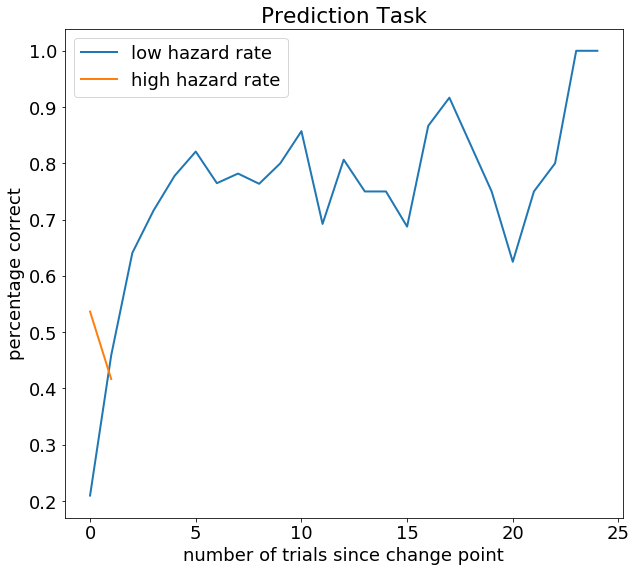

In [23]:
# Plotting the prediction task over 4 subjects.
plt.plot(low_vector_pred, correct_low_pred, linewidth = 2)
plt.plot(high_vector_pred, correct_high_pred, linewidth = 2)
plt.title("Prediction Task")
plt.legend(['low hazard rate', 'high hazard rate'])
plt.xlabel('number of trials since change point')
plt.ylabel('percentage correct')
print(correct_high_pred)

In [ ]:
# Plotting: percent correct vs. number of trials since the changepoint. 
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 9) # (w, h) # figure size 
plt.rcParams.update({'font.size': 18})

#Plotting the report task over 4 subjects.
plt.plot(vector_rep_low, low_rep_list, linewidth = 2)
plt.plot(vector_rep_high, high_rep_list, linewidth = 2)
plt.title("Report Task")
plt.legend(['low hazard rate', 'high hazard rate'])
plt.xlabel('number of trials since change point')
plt.ylabel('percentage correct')


In [ ]:
# Plotting the prediction task over 4 subjects.
plt.plot(vector_pred_low, low_pred_list, linewidth = 2)
plt.plot(vector_pred_high, high_pred_list, linewidth = 2)
plt.title("Prediction Task")
plt.legend(['low hazard rate', 'high hazard rate'])
plt.xlabel('number of trials since change point')
plt.ylabel('percentage correct')
print(high_pred_list)

In [ ]:
a=pd.DataFrame([{'a':1, 'b':2}])
print(a)

In [ ]:
a['n'] = [1]*a.count()
print(a)

In [ ]:
print([1]*a.count())